In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')


Reading the data

In [2]:
diabetes_data=pd.read_csv(r"C:\Users\kamma\Downloads\diabetes.csv")
print(diabetes_data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Cleaning the data

In [3]:
diabetes_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Format the data

In [5]:
print("dimension of diabetes data: {}".format(diabetes_data.shape))

dimension of diabetes data: (768, 9)


check for Null values

In [6]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# check the type of 'data'
type(diabetes_data)

pandas.core.frame.DataFrame

In [9]:
# get the row index
diabetes_data_row_idx=diabetes_data.index
diabetes_data_row_idx


RangeIndex(start=0, stop=768, step=1)

In [10]:
# get the data for different attributes
diabetes_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
## Counting cells with 0 Values for each variable and publishing the counts below
(diabetes_data.Pregnancies == 0).sum(),(diabetes_data.Glucose==0).sum(),(diabetes_data.BloodPressure==0).sum(),(diabetes_data.SkinThickness==0).sum(),(diabetes_data.Insulin==0).sum(),(diabetes_data.BMI==0).sum(),(diabetes_data.DiabetesPedigreeFunction==0).sum(),(diabetes_data.Age==0).sum()

(111, 5, 35, 227, 374, 11, 0, 0)

* As Zero Counts of some the variables are as high as 374 and 227, in a 768 data set, it is better to remove the Zeros uniformly for 5 variables (except Pregnancies & Outcome)
* We’ll drop 0 values and create a our new dataset which can be used for further analysis

In [14]:
drop_Glu = diabetes_data.index[diabetes_data.Glucose == 0].tolist()
drop_BP = diabetes_data.index[diabetes_data.BloodPressure == 0].tolist()
drop_Skin = diabetes_data.index[diabetes_data.SkinThickness == 0].tolist()
drop_Ins = diabetes_data.index[diabetes_data.Insulin == 0].tolist() 
drop_BMI = diabetes_data.index[diabetes_data.BMI == 0].tolist()

In [15]:
# Creating a dataset called 'dia' from original dataset 'diabetes_data' 
# with excludes all rows with have zeros only for Glucose, BP, Skinthickness, Insulin and BMI, as other columns can contain Zero values.

c = drop_Glu + drop_BP + drop_Skin + drop_Ins + drop_BMI
dia = diabetes_data.drop(diabetes_data.index[c])

In [16]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


In [17]:
dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Splitting the data based on Outcomes

In [19]:
dia1=dia[dia.Outcome==1]
dia0=dia[dia.Outcome==0]

Text(0.5, 1.0, 'Count Plot for Outcome')

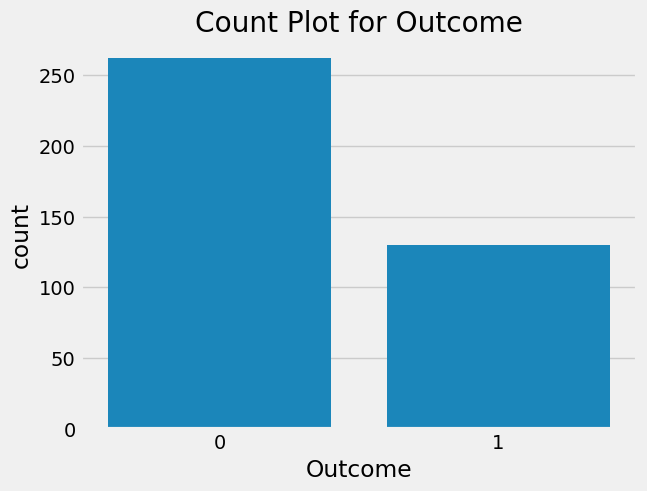

In [20]:
## creating count plot with title using seaborn
sns.countplot(x = dia.Outcome)
plt.title("Count Plot for Outcome")

In [23]:
#compute the percent of diabetic and non diabetic
out1=len(dia[dia.Outcome==1])
out0=len(dia[dia.Outcome==0])
Total=out1+out0
pc_of_0= (out1*100)/Total
pc_of_1=(out0*100)/Total
pc_of_1,pc_of_0

(66.83673469387755, 33.16326530612245)

from the above output we can say that there are 66.8 percent diabetes people and 33.16 percent are non diabetic

For Pregnancies

Text(0.5, 1.0, 'box plot for outcome segmentation')

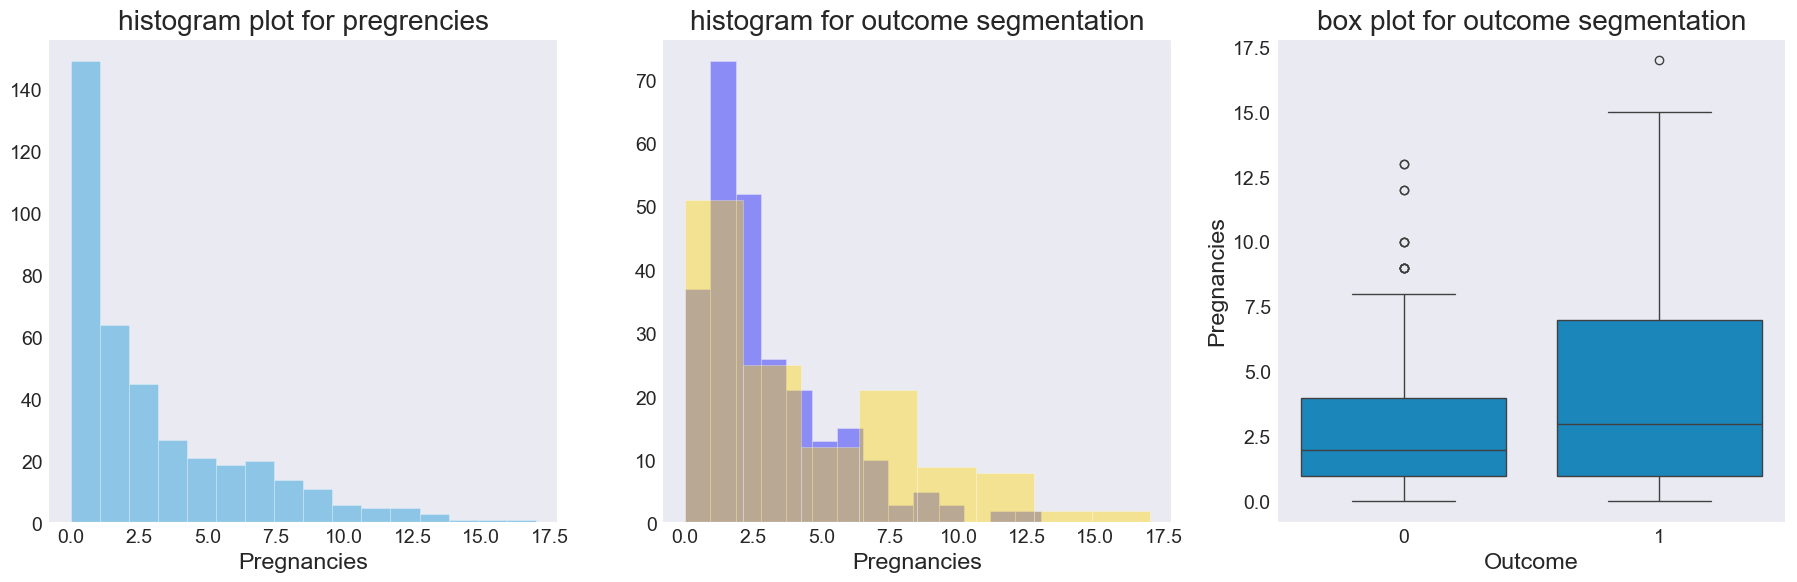

In [30]:
#plotting of histograms and boxplots
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("histogram plot for pregrencies")
sns.distplot(dia.Pregnancies,kde=False)

# segmentation based on outcome
plt.subplot(1,3,2)
sns.distplot(dia0.Pregnancies,kde=False, color="Blue",label="preg for out 0")
sns.distplot(dia1.Pregnancies,kde=False, color="Gold", label="preg for out 1")
plt.title("histogram for outcome segmentation")
# segmentation by boxplot
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome,y=dia.Pregnancies)
plt.title("box plot for outcome segmentation")

For Glucose

Text(0.5, 1.0, 'Boxplot for Glucose by Outcome')

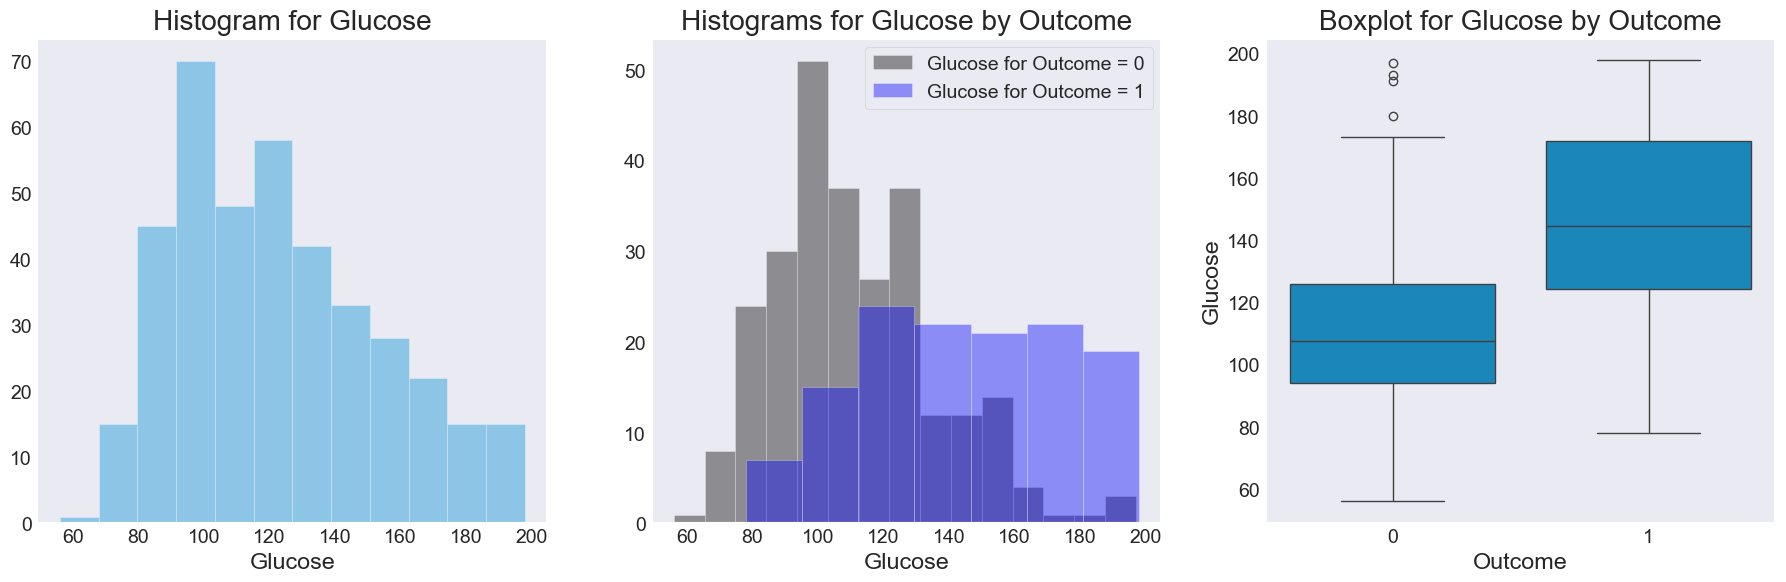

In [31]:
#1st for histogram
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.title("Histogram for Glucose")
sns.distplot(dia.Glucose, kde = False)
plt.subplot(1,3,2)

# 2nd for histogram segmented by Outcome
sns.distplot(dia0.Glucose, kde = False, color = "black", label = "Glucose for Outcome = 0")
sns.distplot(dia1.Glucose, kde = False, color = "Blue", label = "Glucose for Outcome = 1")
plt.title("Histograms for Glucose by Outcome")
plt.legend()

# 3rd for representing same segmentation using boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x = dia.Outcome, y = dia.Glucose)
plt.title("Boxplot for Glucose by Outcome")

For Blood Presuure

Text(0.5, 1.0, 'Boxplot of BP by Outcome')

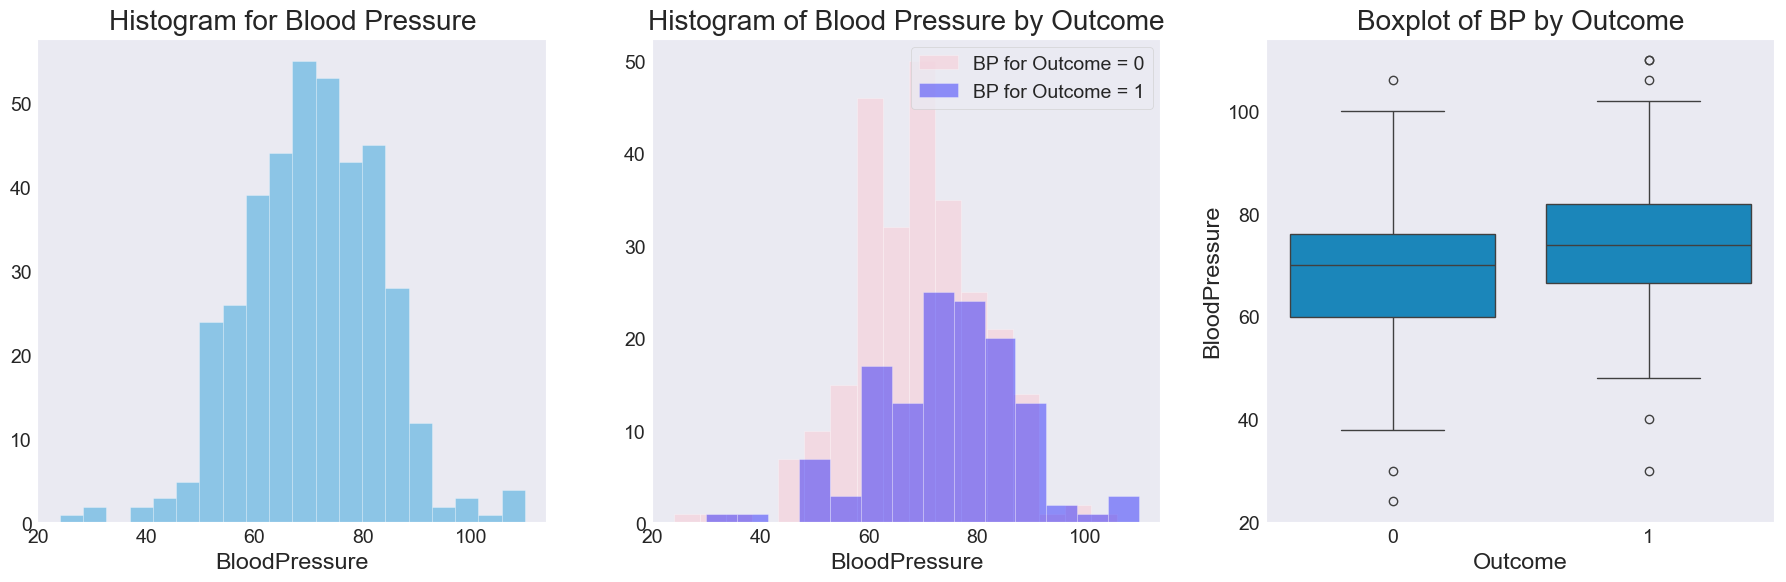

In [32]:
# Create 3 plots
# 1st for histogram
plt.figure(figsize = (20, 6))
plt.subplot(1, 3, 1)
sns.distplot(dia.BloodPressure, kde = False)
plt.title("Histogram for Blood Pressure")

# 2nd for histogram segmented by Outcome
plt.subplot(1, 3, 2)
sns.distplot(dia0.BloodPressure, kde = False, color = "Pink", label = "BP for Outcome = 0")
sns.distplot(dia1.BloodPressure, kde = False, color = "Blue", label = "BP for Outcome = 1")
plt.legend()
plt.title("Histogram of Blood Pressure by Outcome")

# 3rd for representing same segmentation using boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x = dia.Outcome, y = dia.BloodPressure)
plt.title("Boxplot of BP by Outcome")

For Skin thickness

Text(0.5, 1.0, 'Boxplot of SkinThickness by Outcome')

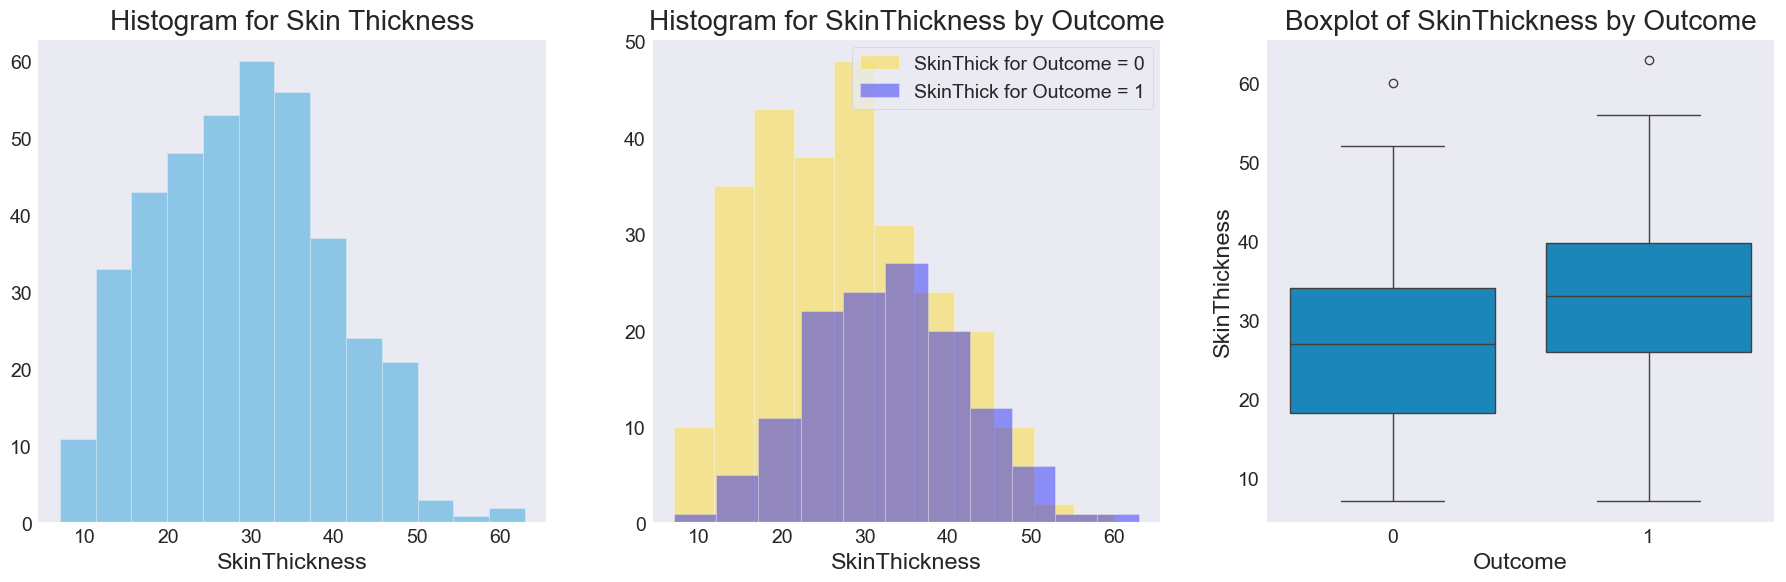

In [33]:
# Create 3 plots
# 1st for histogram
plt.figure(figsize = (20, 6))
plt.subplot(1, 3, 1)
sns.distplot(dia.SkinThickness, kde = False)
plt.title("Histogram for Skin Thickness")

# 2nd for histogram segmented by Outcome
plt.subplot(1, 3, 2)
sns.distplot(dia0.SkinThickness, kde = False, color = "Gold", label = "SkinThick for Outcome = 0")
sns.distplot(dia1.SkinThickness, kde = False, color = "Blue", label = "SkinThick for Outcome = 1")
plt.legend()
plt.title("Histogram for SkinThickness by Outcome")

# 3rd for representing same segmentation using boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x = dia.Outcome, y = dia.SkinThickness)
plt.title("Boxplot of SkinThickness by Outcome")

For insulin

Text(0.5, 1.0, 'Boxplot for Insulin by Outcome')

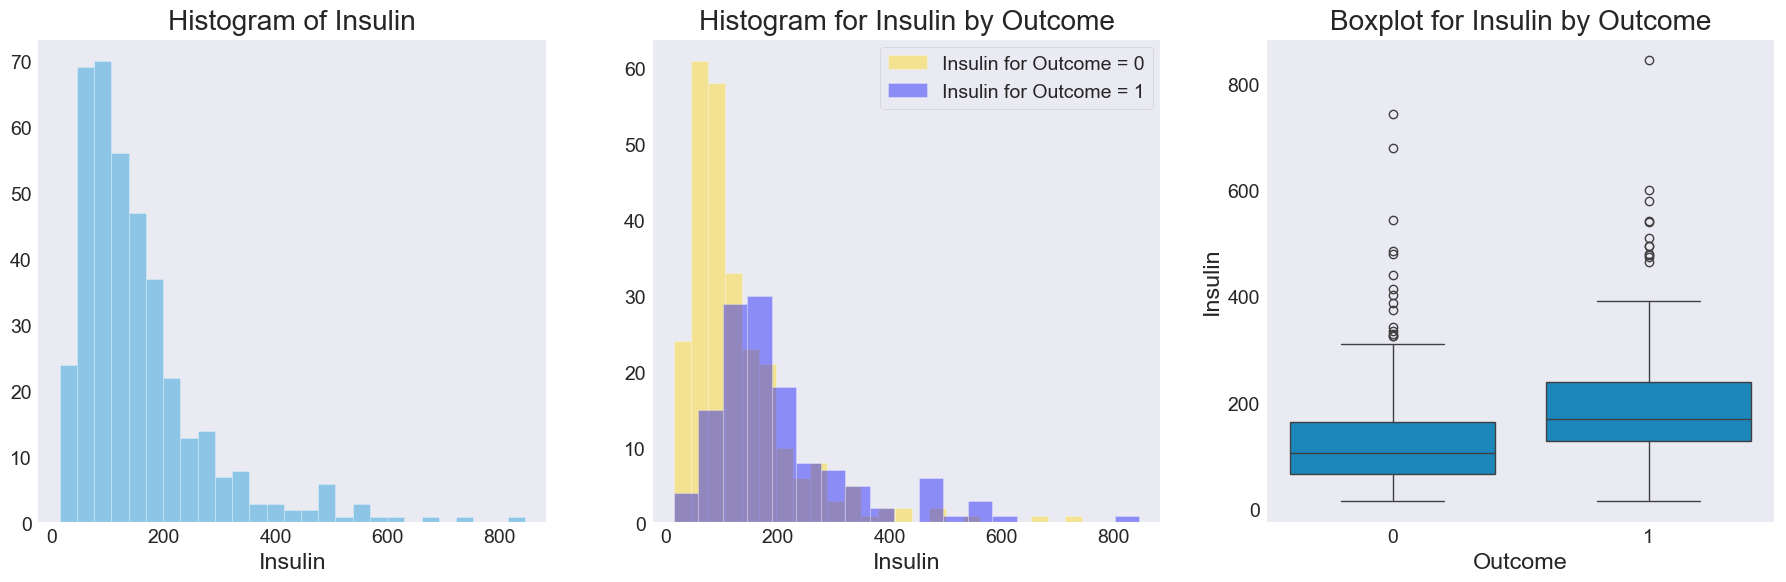

In [34]:
# Create 3 plots
# 1st for histogram
plt.figure(figsize = (20, 6))
plt.subplot(1, 3, 1)
sns.distplot(dia.Insulin, kde = False)
plt.title("Histogram of Insulin")

# 2nd for histogram segmented by Outcome
plt.subplot(1, 3, 2)
sns.distplot(dia0.Insulin, kde = False, color = "Gold", label = "Insulin for Outcome = 0")
sns.distplot(dia1.Insulin, kde = False, color = "Blue", label = "Insulin for Outcome = 1")
plt.title("Histogram for Insulin by Outcome")
plt.legend()

# 3rd for representing same segmentation using boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x = dia.Outcome, y = dia.Insulin)
plt.title("Boxplot for Insulin by Outcome")

For BMI(Body Mass Index)

Text(0.5, 1.0, 'Boxplot for BMI by Outcome')

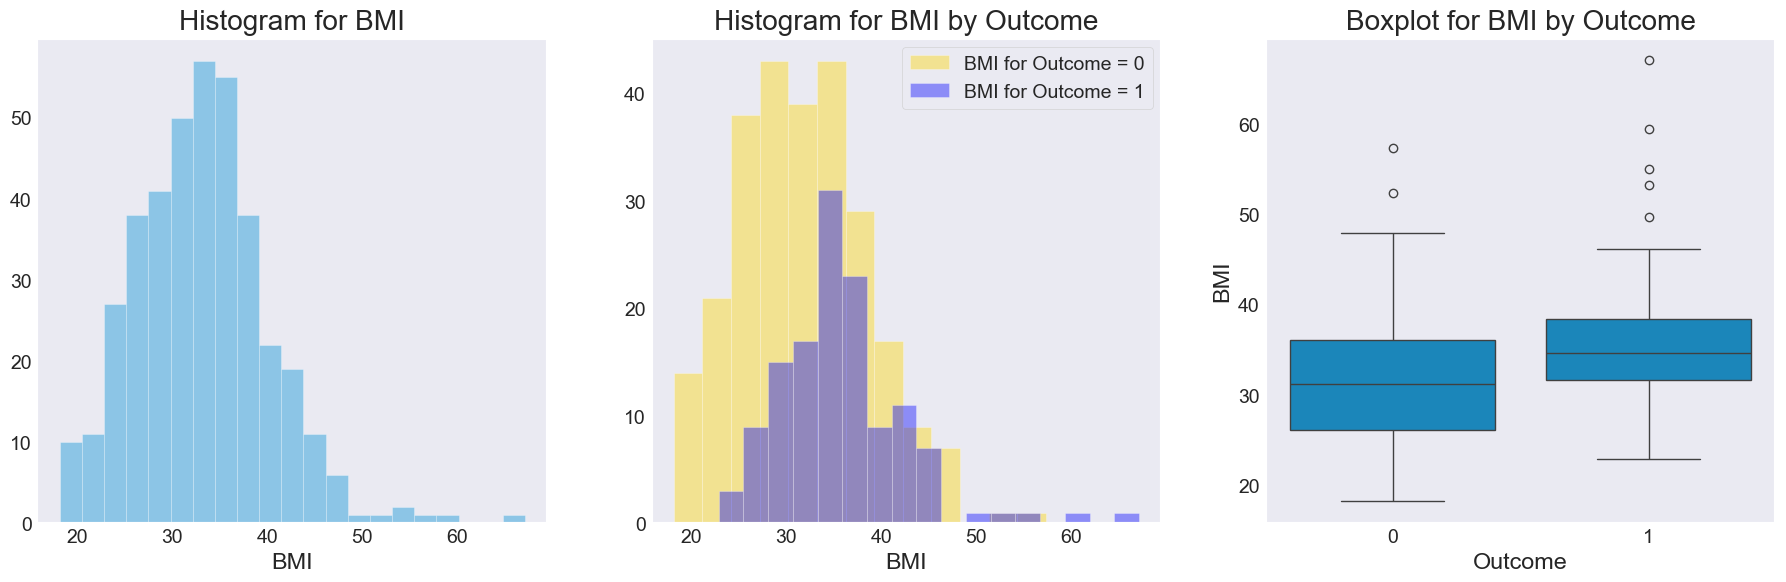

In [35]:
# Create 3 plots
# 1st for histogram
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.distplot(dia.BMI, kde = False)
plt.title("Histogram for BMI")

# 2nd for histogram segmented by Outcome
plt.subplot(1, 3, 2)
sns.distplot(dia0.BMI, kde = False, color = "Gold", label = "BMI for Outcome = 0")
sns.distplot(dia1.BMI, kde = False, color = "Blue", label = "BMI for Outcome = 1")
plt.legend()
plt.title("Histogram for BMI by Outcome")

# 3rd for representing same segmentation using boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x = dia.Outcome, y = dia.BMI)
plt.title("Boxplot for BMI by Outcome")

For Diabetes Pedigree function

Text(0.5, 1.0, 'Boxplot for DiabetesPedigreeFunction by Outcome')

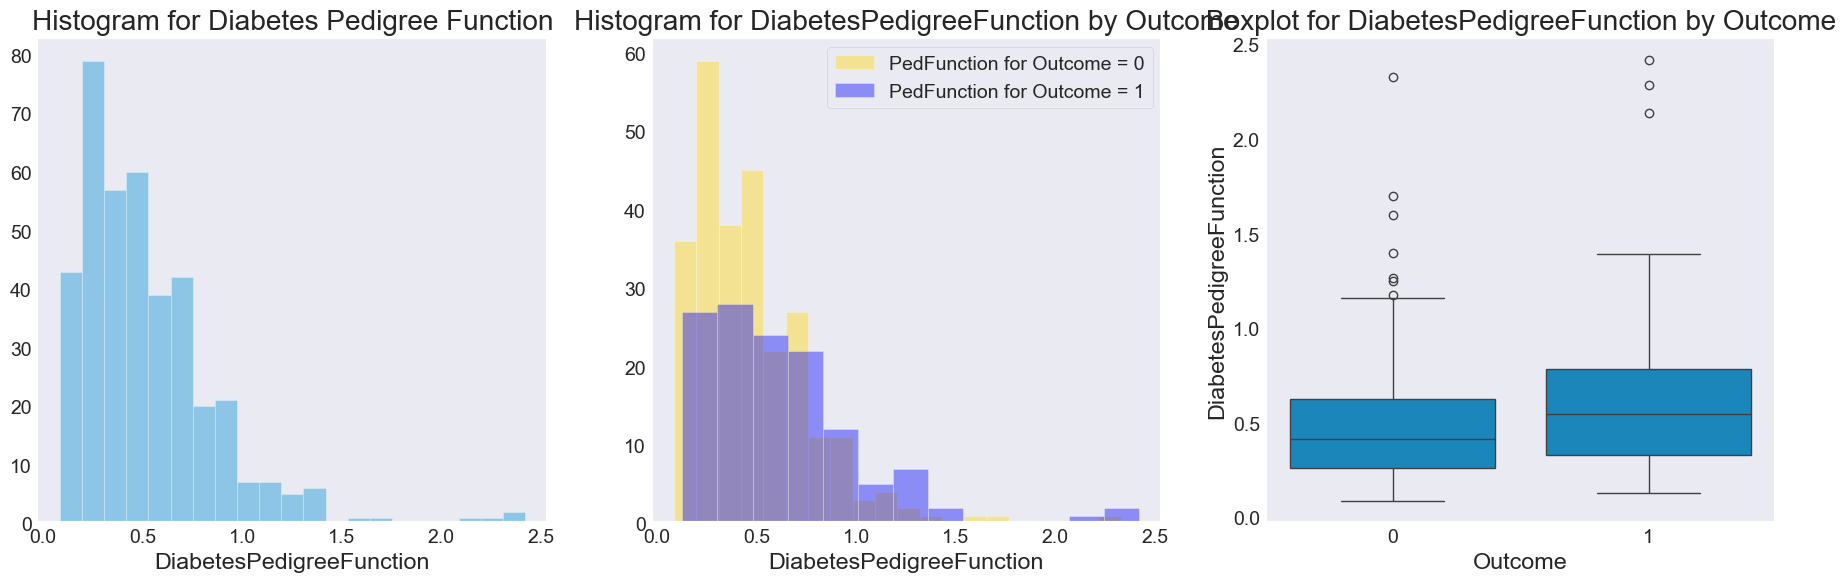

In [36]:
# Create 3 plots
# 1st for histogram
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dia.DiabetesPedigreeFunction,kde=False)
plt.title("Histogram for Diabetes Pedigree Function")

# 2nd for histogram segmented by Outcome
plt.subplot(1,3,2)
sns.distplot(dia0.DiabetesPedigreeFunction, kde=False, color="Gold", label="PedFunction for Outcome = 0")
sns.distplot(dia1.DiabetesPedigreeFunction, kde=False, color="Blue", label="PedFunction for Outcome = 1")
plt.legend()
plt.title("Histogram for DiabetesPedigreeFunction by Outcome")

# 3rd for representing same segmentation using boxplot
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome, y=dia.DiabetesPedigreeFunction)
plt.title("Boxplot for DiabetesPedigreeFunction by Outcome")

For Age

Text(0.5, 1.0, 'Boxplot for Age by Outcome')

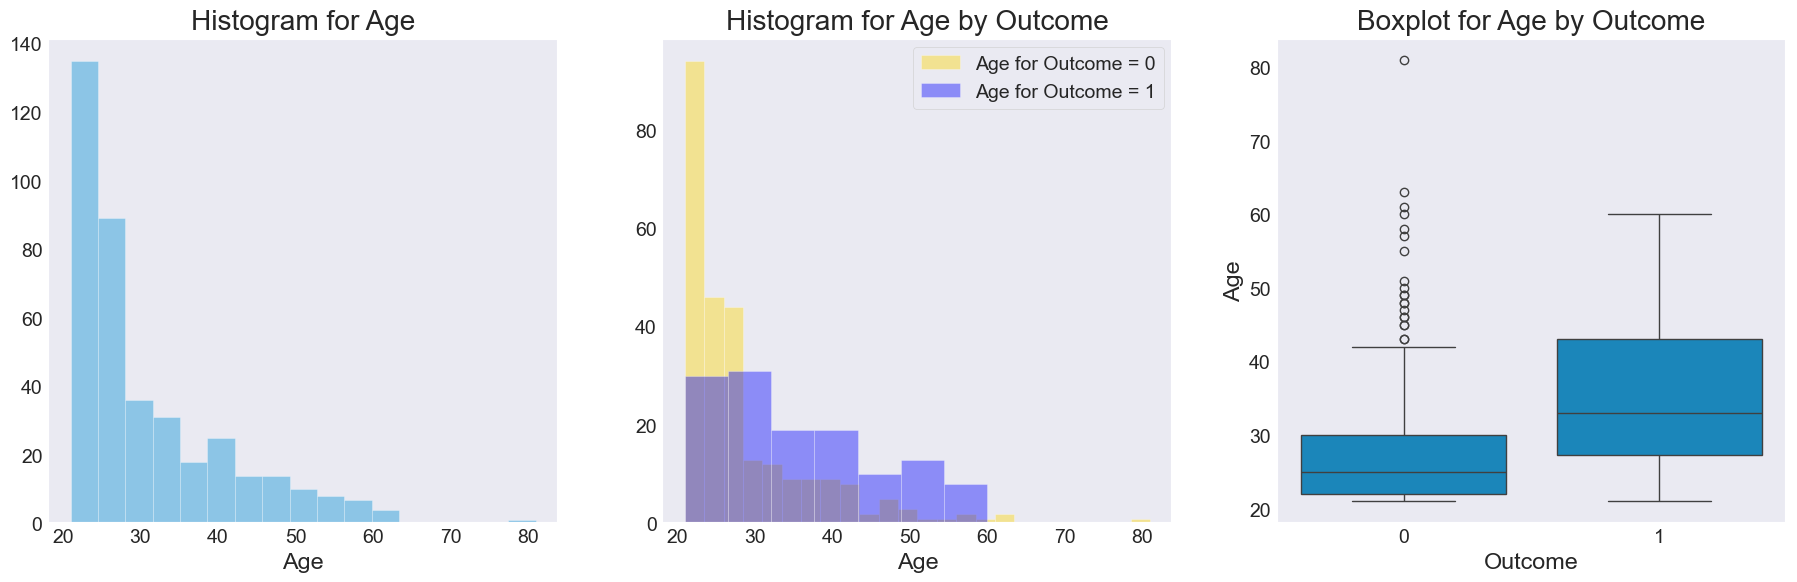

In [37]:
# Create 3 plots
# 1st for histogram
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dia.Age,kde=False)
plt.title("Histogram for Age")

# 2nd for histogram segmented by Outcome
plt.subplot(1,3,2)
sns.distplot(dia0.Age,kde=False, color="Gold", label="Age for Outcome = 0")
sns.distplot(dia1.Age,kde=False, color="Blue", label="Age for Outcome = 1")
plt.legend()
plt.title("Histogram for Age by Outcome")

# 3rd for representing same segmentation using boxplot
plt.subplot(1,3,3)
sns.boxplot(x=dia.Outcome,y=dia.Age)
plt.title("Boxplot for Age by Outcome")

Normalisation of attributes

In [38]:
from scipy import stats



In [39]:
PregnanciesPVAL = stats.normaltest(dia.Pregnancies).pvalue
print("Pregnancies P Value is " + str(PregnanciesPVAL))

Pregnancies P Value is 6.155097831782508e-20


In [40]:
GlucosePVAL = stats.normaltest(dia.Glucose).pvalue
print("Glucose P Value is " + str(GlucosePVAL))

Glucose P Value is 1.3277887088487345e-05


In [41]:
BloodPressurePVAL = stats.normaltest(dia.BloodPressure).pvalue
print("BloodPressure P Value is " + str(BloodPressurePVAL))


BloodPressure P Value is 0.030164917115239397


In [42]:
SkinThicknessPVAL = stats.normaltest(dia.SkinThickness).pvalue
print("Skin Thickness P Value is " + str(SkinThicknessPVAL))

Skin Thickness P Value is 0.015483329354498143


In [43]:
BMIPVAL = stats.normaltest(dia.BMI).pvalue
print("BMI P Value is " + str(BMIPVAL))

BMI P Value is 1.4285556992424915e-09


In [44]:
DiaPeFuPVAL = stats.normaltest(dia.DiabetesPedigreeFunction).pvalue
print("Diabetes Pedigree Function P Value is " + str(DiaPeFuPVAL))

Diabetes Pedigree Function P Value is 1.1325395699626469e-39


In [45]:
AgePVAL = stats.normaltest(dia.Age).pvalue
print("Age P Value is " + str(AgePVAL))

Age P Value is 1.0358469089881947e-21


In [ ]:
import seaborn as sns

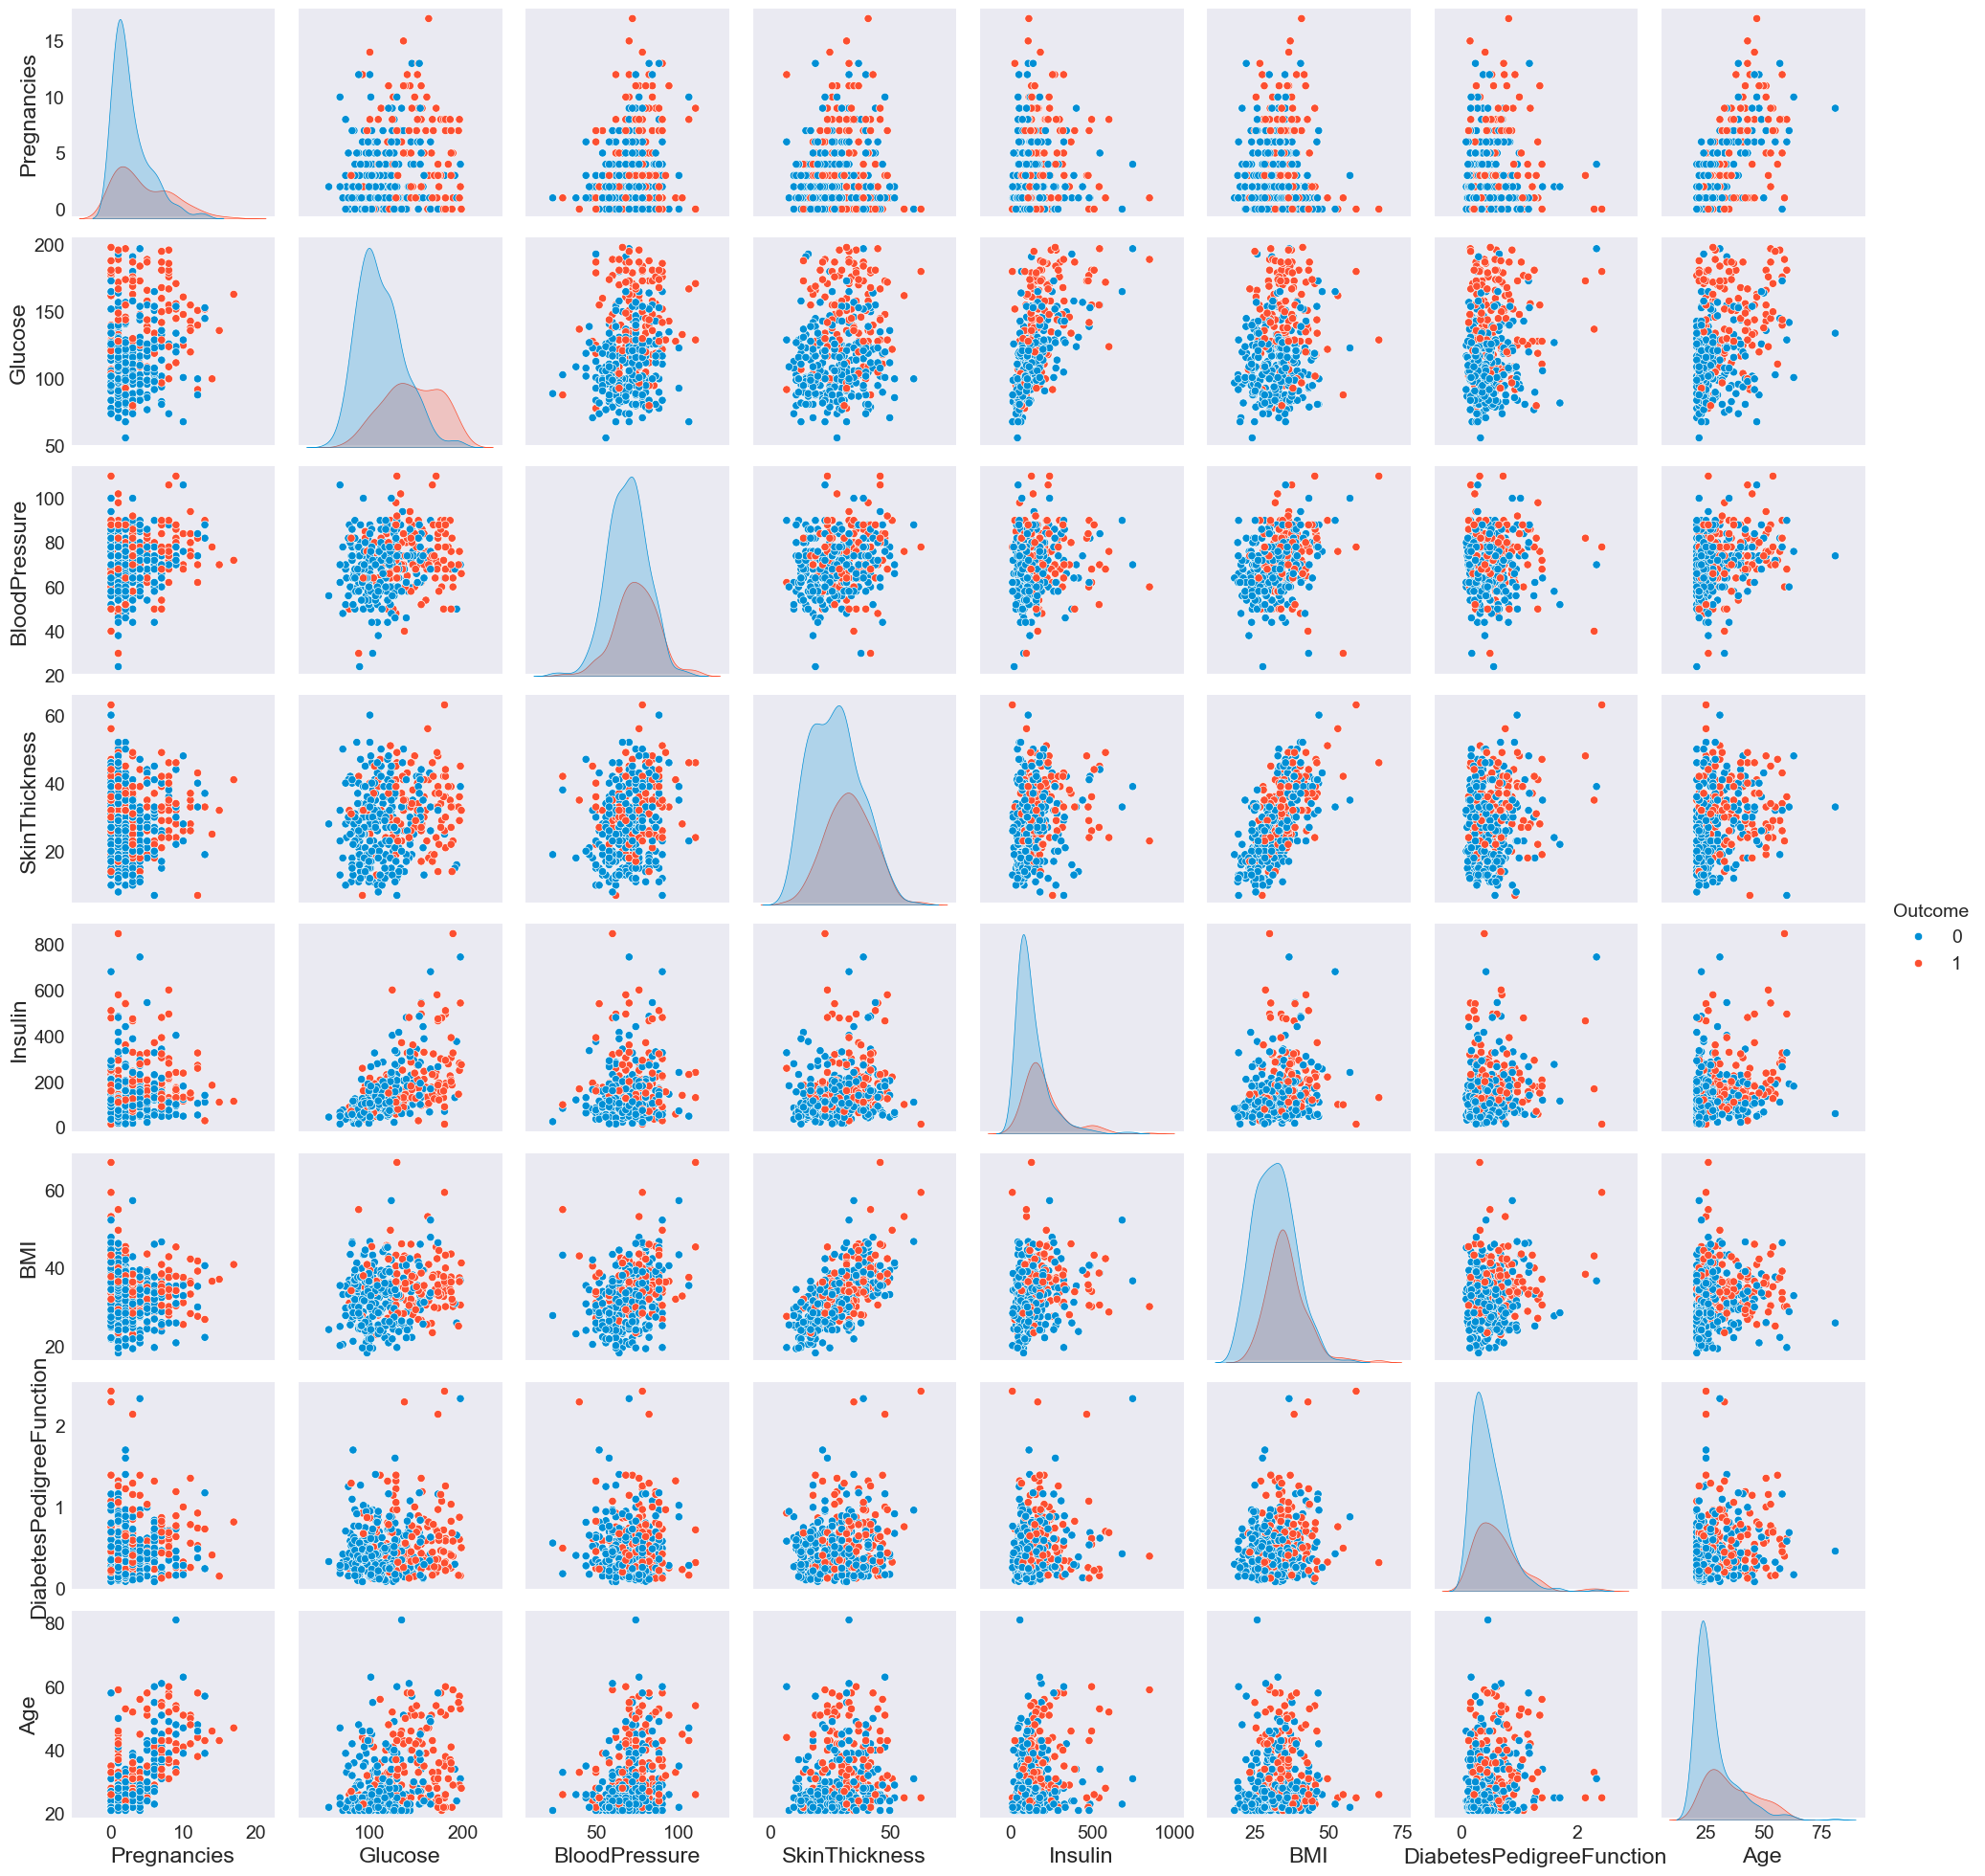

In [46]:
# Pairplot
sns.pairplot(dia, vars=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"],hue="Outcome")

Pearson Correlation

In [47]:
cor = dia.corr(method ='pearson')
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


<Axes: >

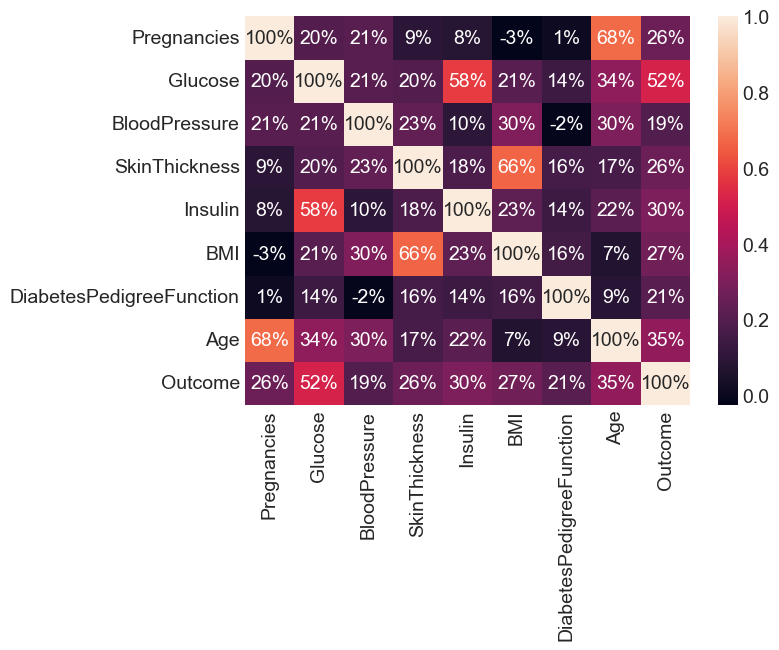

In [48]:
sns.heatmap(cor, annot=True, fmt= "0.0%")

worlin on diabetes_data

In [51]:
# Create Nutritional status column 
Nutritional_status = pd.Series([]) 

In [52]:
# Nutritional status based on BMI

for i in range(len(diabetes_data)): 
    if diabetes_data['BMI'][i] == 0.0: 
        Nutritional_status[i]= "NA"
    
    elif diabetes_data['BMI'][i] < 18.5: 
        Nutritional_status[i]= "Underweight"
        
    elif diabetes_data['BMI'][i] < 25: 
        Nutritional_status[i]= "Normal"
  
    elif diabetes_data['BMI'][i] >= 25 and diabetes_data['BMI'][i] < 30: 
        Nutritional_status[i]= "Overweight"
  
    elif diabetes_data['BMI'][i] >= 30: 
        Nutritional_status[i]= "Obese"
        
    else: 
        Nutritional_status[i]= diabetes_data['BMI'][i] 

In [53]:
diabetes_data.insert(6, "Nutritional Status", Nutritional_status)

In [54]:
diabetes_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,Obese,0.627,50,1
1,1,85,66,29,0,26.6,Overweight,0.351,31,0
2,8,183,64,0,0,23.3,Normal,0.672,32,1
3,1,89,66,23,94,28.1,Overweight,0.167,21,0
4,0,137,40,35,168,43.1,Obese,2.288,33,1


In [55]:
diabetes_data['Nutritional Status'].value_counts()

Nutritional Status
Obese          472
Overweight     179
Normal         102
NA              11
Underweight      4
Name: count, dtype: int64

In [56]:
OGTT_Interpretation = pd.Series([]) 

In [57]:
# Interpretation of OGTT (Glucose) - using OGTT levels recommended by DIABETES UK (2019)
for i in range(len(diabetes_data)): 
    if diabetes_data['Glucose'][i] == 0.0: 
        OGTT_Interpretation [i]="NA"
    
    elif diabetes_data['Glucose'][i] <= 140: 
        OGTT_Interpretation [i]="Normal"
    
    elif diabetes_data['Glucose'][i] > 140 & diabetes_data['Glucose'][i] <= 198: 
        OGTT_Interpretation [i]="Impaired Glucose Tolerance"
        
    elif diabetes_data['Glucose'][i] > 198: 
        OGTT_Interpretation[i]="Diabetic Level"
        
    else: 
        OGTT_Interpretation [i]= diabetes_data['Glucose'][i] 

In [58]:
diabetes_data.insert(2, "Glucose Result", OGTT_Interpretation)

In [59]:
diabetes_data['Glucose Result'].value_counts()

Glucose Result
Normal                        571
Impaired Glucose Tolerance    192
NA                              5
Name: count, dtype: int64

HOMA_Insulin Resistance

In [62]:
Impaired_Glucose_Tolerance_Diabetic = ((diabetes_data['Glucose'] > 140 ) & (diabetes_data['Glucose'] <= 198) & 
                                       (diabetes_data['Outcome'] == 1)).sum()
Impaired_Glucose_Tolerance_Diabetic

131

In [63]:
Normal_Glucose_Diabetic = ((diabetes_data['Glucose'] != 0 ) & (diabetes_data['Glucose'] <= 140) & (diabetes_data['Outcome'] == 1)).sum()
Normal_Glucose_Diabetic

134

In [64]:
diabetes_data.max()

Pregnancies                          17
Glucose                             199
Glucose Result                   Normal
BloodPressure                       122
SkinThickness                        99
Insulin                             846
BMI                                67.1
Nutritional Status          Underweight
DiabetesPedigreeFunction           2.42
Age                                  81
Outcome                               1
dtype: object

In [65]:
diabetes_data.min()


Pregnancies                                          0
Glucose                                              0
Glucose Result              Impaired Glucose Tolerance
BloodPressure                                        0
SkinThickness                                        0
Insulin                                              0
BMI                                                0.0
Nutritional Status                                  NA
DiabetesPedigreeFunction                         0.078
Age                                                 21
Outcome                                              0
dtype: object

In [66]:
diabetes_data_underweight = diabetes_data[diabetes_data['Nutritional Status'] =='Underweight']
diabetes_data_underweight

,Pregnancies,Glucose,Glucose Result,BloodPressure,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
239,0,104,Normal,76,0,0,18.4,Underweight,0.582,27,0
418,1,83,Normal,68,0,0,18.2,Underweight,0.624,27,0
438,1,97,Normal,70,15,0,18.2,Underweight,0.147,21,0
526,1,97,Normal,64,19,82,18.2,Underweight,0.299,21,0


In [67]:
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [68]:
df = diabetes_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

In [69]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [70]:
df.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [71]:
diabetes_data_glucose = df.loc[df['Glucose'] != 0]

In [72]:
diabetes_data_glucose.shape

(763, 9)

In [73]:
diabetes_data_glucose['Glucose'].mean()


121.6867627785059

In [74]:
diabetes_data_glucose.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.311871,110.643863,68.213280,19.631791,69.160966,30.317304,0.430662,31.247485
1,4.860902,142.319549,70.800752,22.056391,101.090226,35.106015,0.550605,37.052632


In [75]:
diabetes_data_glucose['Glucose'].min()

44

In [76]:
diabetes_data_glucose['Glucose'].max()

199

In [77]:
df_all = df.loc[(df['BMI'] != 0) & (df['Insulin'] != 0) & 
                           (df['BloodPressure'] != 0) & (df['Glucose'] != 0)]

In [78]:
df_all['Outcome'].value_counts()

Outcome
0    262
1    130
Name: count, dtype: int64

In [79]:
df_all.mean()

Pregnancies                   3.301020
Glucose                     122.627551
BloodPressure                70.663265
SkinThickness                29.145408
Insulin                     156.056122
BMI                          33.086224
DiabetesPedigreeFunction      0.523046
Age                          30.864796
Outcome                       0.331633
dtype: float64

In [80]:
df_all.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.721374,111.431298,68.969466,27.251908,130.854962,31.750763,0.472168,28.347328
1,4.469231,145.192308,74.076923,32.961538,206.846154,35.777692,0.625585,35.938462


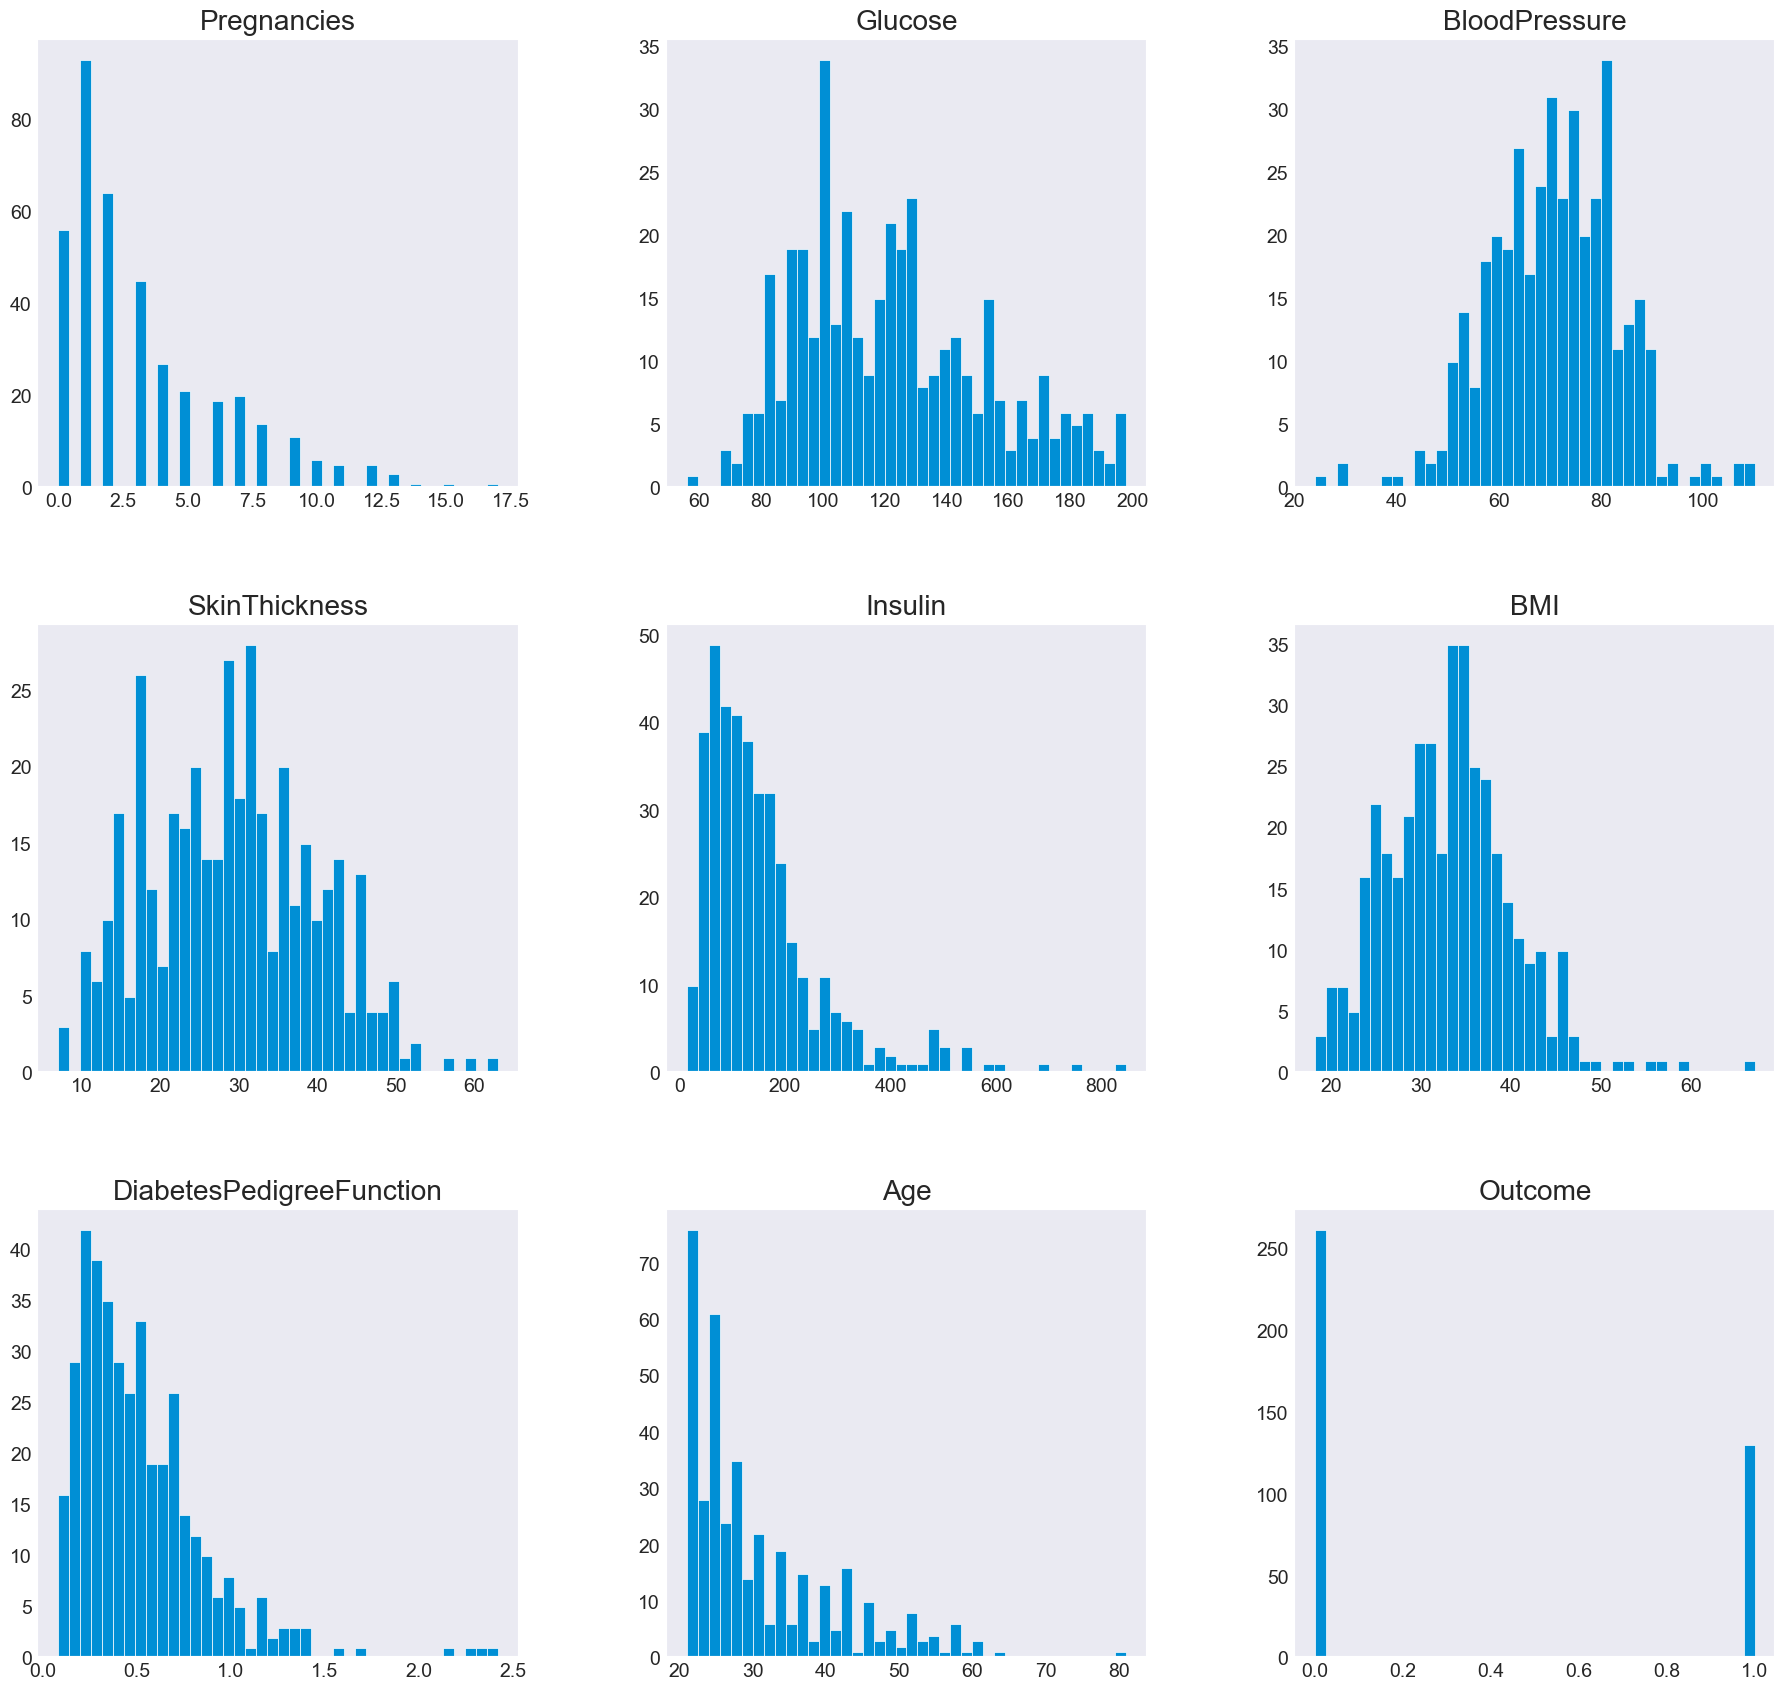

In [83]:
df_all.hist(bins=40, figsize=(20, 20), grid = False)
plt.show()

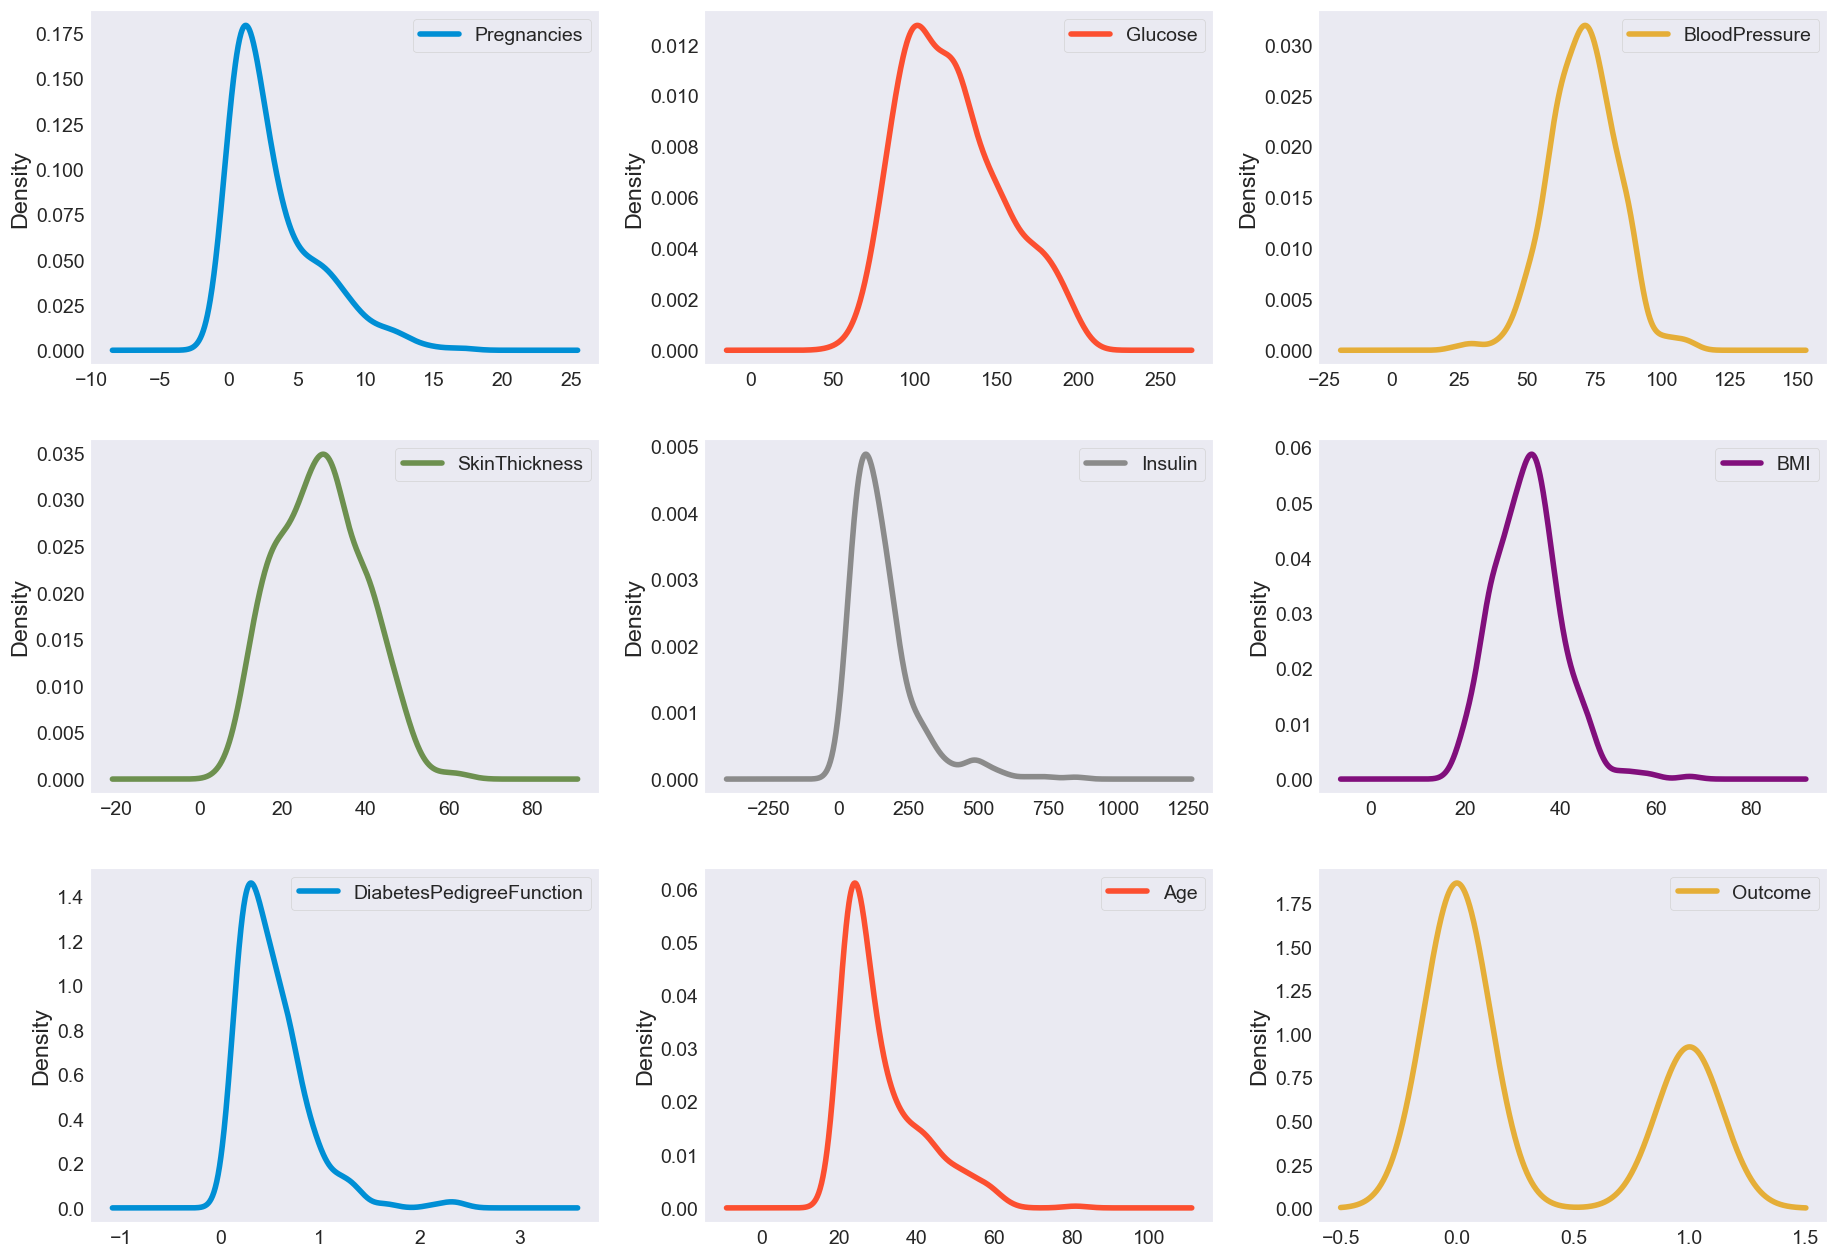

In [84]:
df_all.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()

Pregnancies                     Axes(0.08,0.641765;0.255882x0.238235)
Glucose                     Axes(0.387059,0.641765;0.255882x0.238235)
BloodPressure               Axes(0.694118,0.641765;0.255882x0.238235)
SkinThickness                   Axes(0.08,0.355882;0.255882x0.238235)
Insulin                     Axes(0.387059,0.355882;0.255882x0.238235)
BMI                         Axes(0.694118,0.355882;0.255882x0.238235)
DiabetesPedigreeFunction            Axes(0.08,0.07;0.255882x0.238235)
Age                             Axes(0.387059,0.07;0.255882x0.238235)
Outcome                         Axes(0.694118,0.07;0.255882x0.238235)
dtype: object

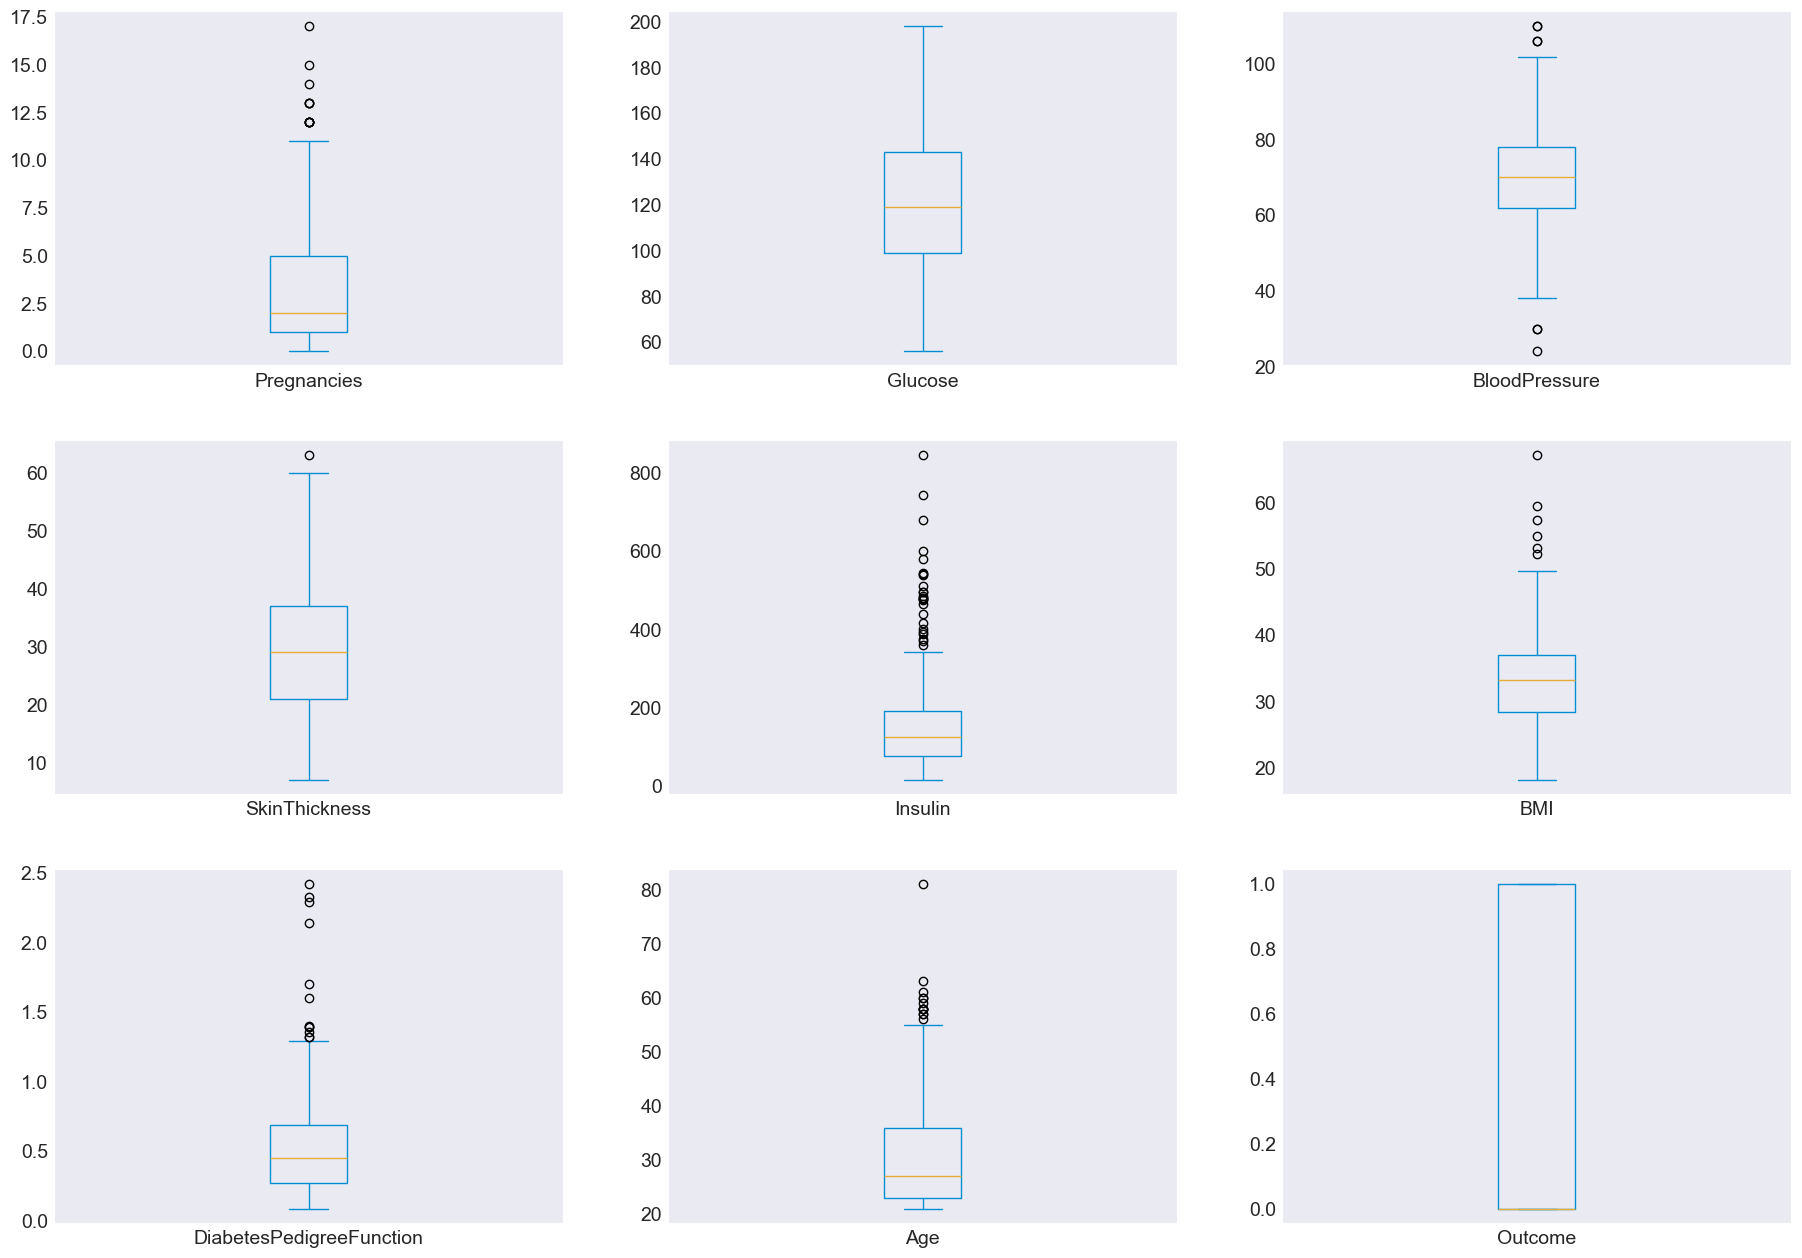

In [85]:
df_all.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))

In [86]:
skew = df_all.skew(axis = 1)

Corelation

In [87]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [88]:
print(df.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [90]:
cols = ["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"]
X = df[cols]
y = df.Outcome

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Outcome'], 
                                                    df['Outcome'], stratify = df['Outcome'], random_state=66)


MAchine Learning Model: Decision Tree Model

In [92]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.714
